<a href="https://colab.research.google.com/github/jiachun23/StudentDropout_ChurnPrediction/blob/main/ChurnPrediction_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing packages
import numpy as np
from numpy import where
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Importing and cleaning the data
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/DBS.csv', sep=';')
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [4]:
test_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,794,68.10,A,19.40,100.23,A,37,235.34,A,1,2020,2020/2021
1,844,57.85,C,12.57,96.14,A,32,215.75,B,1,2020,2020/2021
2,658,64.60,B,17.57,101.59,A,37,224.27,B,1,2020,2020/2021
3,1193,56.93,C,13.28,102.31,A,36,216.56,B,1,2020,2020/2021
4,1400,61.35,C,15.40,93.72,B,34,214.72,B,1,2020,2020/2021


In [5]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [6]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

Counter({1: 210, 0: 51})


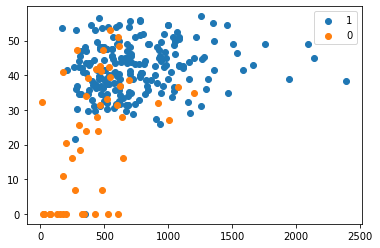

In [7]:
counter = Counter(y_train)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [8]:
# Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestClassifier(random_state = 1,
                                  n_estimators = 1000,
                                  max_features = 'auto',
                                  max_depth = 50,
                                  bootstrap = False,
                                  min_samples_split = 2,  min_samples_leaf = 1) 
model = forest.fit(X_train, y_train) 
y_pred = model.predict(X_test)

In [11]:
#Evaluation 
from sklearn.metrics import mean_absolute_error
def evaluate(forest, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))
    
    return accuracy

base_accuracy = evaluate(forest, X_test, y_test)

Model Performance
Average Error: 0.0833
Accuracy = 91.67%


Counter({1: 210, 0: 210})


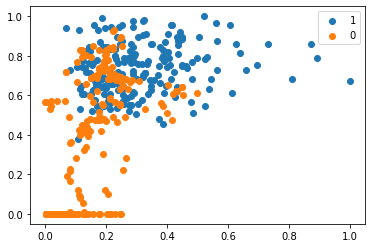

In [12]:
counter = Counter(y_train)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [15]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)


# View accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred_test))

Accuracy:  0.9166666666666666


Recall metric in the testing dataset: 95.65217391304348%


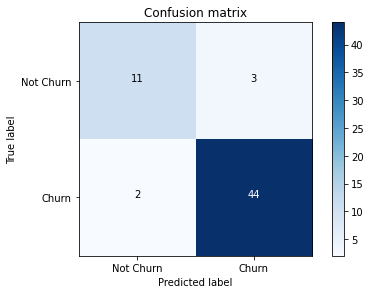

In [16]:
# Classificaton report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = forest.predict(X_test)

cnf_matrix = confusion_matrix(y_test,  y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = ["Not Churn", "Churn"]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [17]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test,  y_pred_test)

array([[11,  3],
       [ 2, 44]])

In [18]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.94      0.96      0.95        46

    accuracy                           0.92        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.92      0.92      0.92        60



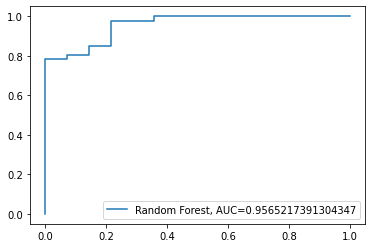

In [19]:
# Import the metrics class
from sklearn import metrics

y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.legend(loc=4)
plt.show()